In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# change path if necessary
import sys
my_path = r'home/ilaria/Scrivania/Machine_Learning/Project_2/Project2'
sys.path.insert(0,my_path + r'/code/COMMON')

# imports
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
import os
os.chdir(r'/home/ilaria/Scrivania/Machine_Learning/Project_2/Project2/code/COMMON')

# Load Glove model

In [6]:
from dictionary_helpers import build_glove_dict

In [7]:
import os
os.chdir(r'/home/ilaria/Scrivania/Machine_Learning/Project_2/data/twitter_datasets_stanford/')

In [8]:
filename_glove_dict = 'glove.twitter.27B.25d.txt'

glove = build_glove_dict(filename_glove_dict)

# Load stop words

In [9]:
import os
os.chdir(r'/home/ilaria/Scrivania/Machine_Learning/Project_2/Project2/data/stop_words/')

In [11]:
filename_stopwords = 'stop_word_freq_min_100_ratio_marg_0.1.txt'

stop_words = []
with open(filename_stopwords, 'r', encoding='utf-8-sig') as f:
    for line in f:
        stop_words.append(line.lstrip().split()[0])
    del stop_words[-1]
    
print("File :", filename_stopwords)
print("Number of stop words :", len(stop_words))

File : stop_word_freq_min_100_ratio_marg_0.1.txt
Number of stop words : 630


# Load tfid 

In [12]:

tfidf = []

# Build tweet vector method

In [13]:
import os
os.chdir(r'/home/ilaria/Scrivania/Machine_Learning/Project_2/Project2/code/ilaria/')

In [14]:
from tweet_processing import build_tweet_vector

In [15]:
# method to build tweet vector
method = ["mean"]

# Build tweet vectors TRAIN

In [16]:
import os
os.chdir(r'/home/ilaria/Scrivania/Machine_Learning/Project_2/Project2/data/twitter_datasets_epfl/short')

In [17]:
# build positive tweet feature set
X_pos = []

with open('train_pos_processed.txt') as f:
    for line in f:
        tweet = line.lstrip().split()
        tweet_vector = build_tweet_vector(tweet, glove, tfidf, stop_words, method)
        if len(tweet_vector):
            X_pos.append(tweet_vector)
        
X_pos = np.array(X_pos)

'lisining to music' is an empty tweet.
'off to burgerboys' is an empty tweet.
'walmart with mommiiee' is an empty tweet.
'off to walmart' is an empty tweet.
'up with andy' is an empty tweet.
'with deanza' is an empty tweet.
'going to crowely' is an empty tweet.


In [18]:
# build negative tweet feature set
X_neg = []

with open('train_neg_processed.txt') as f:
    for line in f:
        tweet = line.lstrip().split()
        tweet_vector = build_tweet_vector(tweet, glove, tfidf, stop_words, method)
        if len(tweet_vector):
            X_neg.append(tweet_vector)
        
X_neg = np.array(X_neg) 

'enough' is an empty tweet.
'im thinking too much' is an empty tweet.
'kgnbgtini hugmepleaseprince ~' is an empty tweet.
'scoiled my tongue' is an empty tweet.
'so insanly busy' is an empty tweet.
'<number><number> philly' is an empty tweet.
'willy willy willy willy' is an empty tweet.


In [19]:
# labels
y_pos = np.ones(X_pos.shape[0])
y_neg = -np.ones(X_neg.shape[0])

In [20]:
# number of training samples
N_samples_train = 50000

# cut samples
X_pos_cut = X_pos[:N_samples_train,:]
X_neg_cut = X_neg[:N_samples_train,:]

# cut targets
y_pos_cut = y_pos[:N_samples_train]
y_neg_cut = y_neg[:N_samples_train]

# concatenate
X_pos_neg = np.concatenate([X_pos_cut, X_neg_cut])
y_pos_neg = np.concatenate([y_pos_cut, y_neg_cut])

# Standardization

In [21]:
# set to "True" to standardize
ifStandardize = False

In [22]:
from sklearn.preprocessing import StandardScaler

if ifStandardize:
    
    scaler = StandardScaler()
    scaler.fit(X_pos_neg)
    X_pos_neg = scaler.transform(X_pos_neg)
    
else: 
    
    X_pos_neg = X_pos_neg

# Hyperparameter optimization (K)

## Grid search and cross validation

In [27]:
from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# data
X = X_pos_neg
y = y_pos_neg

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# range for hyperparameters
#K_range = np.arange(100, 10000, 1000)
K_range = np.array([1000])


# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors': K_range}]
                    
# define grid search CV
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring= 'accuracy', verbose=1)

# fit for every parameters combinations in grid search CV
clf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 31.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': array([1000])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

## Display results

In [28]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
    
print()
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'n_neighbors': 1000}

Grid scores on development set:

0.700 (+/-0.004) for {'n_neighbors': 1000}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.



KeyboardInterrupt: 

In [30]:
scores = clf.cv_results_['mean_test_score']

#plt.figure()
#plt.plot(K_range, scores)
#plt.xlabel('Number of Neighbors K')
#plt.ylabel('Accuracy')
#plt.grid()

In [21]:
# save figure
plt.savefig('KNN_cross_validation_Kmax_20.jpeg')

In [31]:
scores

array([ 0.7])

In [30]:
scores_all = np.array([ 0.65665333,  0.63030667,  0.67570667,  0.66216   ,
        0.68606667,  0.67672   ,  0.69314667,  0.68678667,  0.69753333,  0.69344   ,
        0.70041333,  0.69634667,  0.70292   ,  0.70026667,  0.70632   ,
        0.70354667,  0.7072    ,  0.7064    ,  0.70928   ,  0.7068    ,  
        0.70957333,  0.70805333,  0.71104   ,  0.70933333,
        0.71134667,  0.71125333,  0.71245333,  0.71249333,  0.71370667,
        0.71314667,  0.71338667,  0.71450667,  0.71489333,  0.71488   ])

K_range_all = range(1,scores_all.shape[0]+1)

AttributeError: module 'matplotlib.pyplot' has no attribute 'gbid'

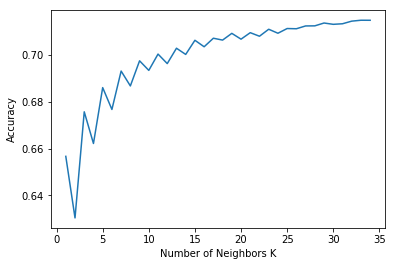

In [31]:
plt.figure()
plt.plot(K_range_all, scores_all)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.gbid()

In [46]:
np.arange(100, 10000, 1000)

array([ 100, 1100, 2100, 3100, 4100, 5100, 6100, 7100, 8100, 9100])